In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance_one_hot = pd.get_dummies(insurance,dtype=int)

In [ ]:
insurance_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   int64  
 5   sex_male          1338 non-null   int64  
 6   smoker_no         1338 non-null   int64  
 7   smoker_yes        1338 non-null   int64  
 8   region_northeast  1338 non-null   int64  
 9   region_northwest  1338 non-null   int64  
 10  region_southeast  1338 non-null   int64  
 11  region_southwest  1338 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 125.6 KB


In [ ]:
X = insurance_one_hot.drop("charges",axis=1)
y = insurance_one_hot["charges"]

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
len(X),len(X_train),len(X_test)
len(y),len(y_train),len(y_test)

(1338, 1070, 268)

In [ ]:
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])
insurance_model.fit(X_train,y_train,epochs=100)


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13283.6621 - mae: 13283.6621
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13161.3926 - mae: 13161.3926
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12907.1152 - mae: 12907.1152
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12375.4473 - mae: 12375.4473
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11410.6797 - mae: 11410.6797
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10023.4570 - mae: 10023.4570
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8563.4863 - mae: 8563.4863
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7618.2383 - mae: 7618.2383
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7410.8447 - mae: 7410.8447
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7375.8867 - mae: 7375.8867 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7354.5522 - mae: 7354.5522
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
insurance_model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5038.0049 - mae: 5038.0049  


[4888.66455078125, 4888.66455078125]

In [ ]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
insurance_model_2.fit(X_train,y_train,epochs=100,verbose=0)

In [ ]:
insurance_model_2.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4955.8105 - mae: 4955.8105  


[4811.79150390625, 4811.79150390625]

In [ ]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=["mae"]
)
insurance_model_3.fit(X_train,y_train,epochs=200,verbose=0)

In [ ]:
insurance_model_3.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3463.3596 - mae: 3463.3596  


[3395.9033203125, 3395.9033203125]

<Axes: ylabel='Frequency'>

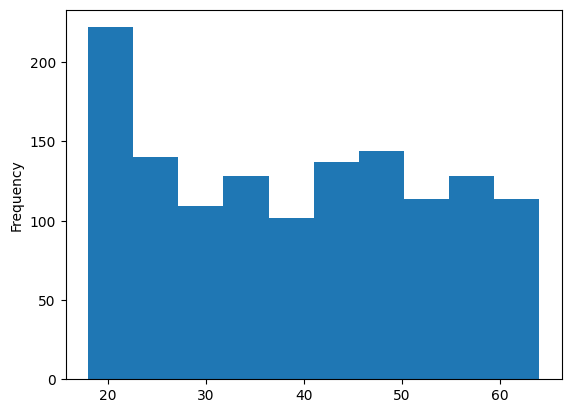

In [ ]:
X['age'].plot(kind='hist')

# Preprocessing Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder


In [ ]:
ct = make_column_transformer(
     (MinMaxScaler(),["age","bmi","children"]),
      (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
 )

In [ ]:
x = insurance.drop("charges",axis=1)
y = insurance["charges"]

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])
insurance_model.fit(X_train_normal,y_train,epochs=200)


Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 13297.3164 - mae: 13297.3164
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13289.6201 - mae: 13289.6201
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13271.1172 - mae: 13271.1172
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13231.1191 - mae: 13231.1191
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13158.1875 - mae: 13158.1875
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13040.9385 - mae: 13040.9385
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12868.5156 - mae: 12868.5156
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12630.7695 - mae: 12630.7695
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12317.9951 - mae: 12317.9951
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11923.3418 - mae: 11923.3418
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11454.9521 - mae: 11454.9521
Epoch 12/200
34/34 ━━━━━━━━━━━

In [ ]:
insurance_model.evaluate(X_test_normal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3213.8481 - mae: 3213.8481  


[3161.023681640625, 3161.023681640625]